1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [45]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [138]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [109]:
import pandas as pd
import numpy as np

N=15000
datas = pd.read_csv('./data/data_000637.txt', nrows=N)
print(datas.shape)

df = pd.DataFrame(datas)
df

(15000, 6)


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9
14996,1,1,17,3869200316,3400,15
14997,1,1,10,3869200316,3530,16
14998,1,1,8,3869200316,3533,18


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [57]:
max_val = data['BX_COUNTER'].max()
print('Maximum value before being reset to zero is: ', max_val, 'ns')

Maximum value before being reset to zero is:  3563 ns


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [75]:
df['ABS_TIME'] = df.apply(lambda ns: ns.ORBIT_CNT + ns.BX_COUNTER + ns.TDC_MEAS, axis =1 )
df['ABS_TIME'] = pd.to_datetime(df['ABS_TIME'])
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,1970-01-01 00:00:03.869202567
1,1,0,124,3869200167,2374,27,1970-01-01 00:00:03.869202568
2,1,0,63,3869200167,2553,28,1970-01-01 00:00:03.869202748
3,1,0,64,3869200167,2558,19,1970-01-01 00:00:03.869202744
4,1,0,64,3869200167,2760,25,1970-01-01 00:00:03.869202952
...,...,...,...,...,...,...,...
11996,1,0,62,3869200286,3246,4,1970-01-01 00:00:03.869203536
11997,1,0,58,3869200286,3246,11,1970-01-01 00:00:03.869203543
11998,1,0,61,3869200286,3251,17,1970-01-01 00:00:03.869203554
11999,1,0,59,3869200286,3248,16,1970-01-01 00:00:03.869203550


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [79]:
df['DURATION'] = df['ABS_TIME'].dt.time
df


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME,DURATION
0,1,0,123,3869200167,2374,26,1970-01-01 00:00:03.869202567,00:00:03.869202
1,1,0,124,3869200167,2374,27,1970-01-01 00:00:03.869202568,00:00:03.869202
2,1,0,63,3869200167,2553,28,1970-01-01 00:00:03.869202748,00:00:03.869202
3,1,0,64,3869200167,2558,19,1970-01-01 00:00:03.869202744,00:00:03.869202
4,1,0,64,3869200167,2760,25,1970-01-01 00:00:03.869202952,00:00:03.869202
...,...,...,...,...,...,...,...,...
11996,1,0,62,3869200286,3246,4,1970-01-01 00:00:03.869203536,00:00:03.869203
11997,1,0,58,3869200286,3246,11,1970-01-01 00:00:03.869203543,00:00:03.869203
11998,1,0,61,3869200286,3251,17,1970-01-01 00:00:03.869203554,00:00:03.869203
11999,1,0,59,3869200286,3248,16,1970-01-01 00:00:03.869203550,00:00:03.869203


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [83]:
n_channels = df.groupby(['TDC_CHANNEL'])['BX_COUNTER'].max()
df = pd.DataFrame(n_channels.head(3))
df

,BX_COUNTER
TDC_CHANNEL,
1,3558
2,3555
3,3557


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [110]:
not_empty = df.groupby(['ORBIT_CNT']).count()
print(len(not_empty))

150


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [111]:
print(len(df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'].unique()))

150


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [115]:
FPGA_0 = df[df['FPGA']==0]
FPGA_0 = pd.Series(s0[['TDC_CHANNEL']].value_counts())
print("THE FPGA = 0 is :\n", FPGA_0)

FPGA_1 = df[df['FPGA'] == 1] 
FPGA_1 = pd.Series(s1[['TDC_CHANNEL']].value_counts())
print("THE FPGA = 1 is : \n", FPGA_1)

THE FPGA = 0 is :
 TDC_CHANNEL
139            879
63             743
64             735
61             555
62             529
              ... 
107              5
99               5
98               5
106              4
101              3
Length: 117, dtype: int64
THE FPGA = 1 is : 
 TDC_CHANNEL
139            389
2              363
1              338
4              290
3              277
              ... 
83               1
93               1
91               1
90               1
78               1
Length: 124, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

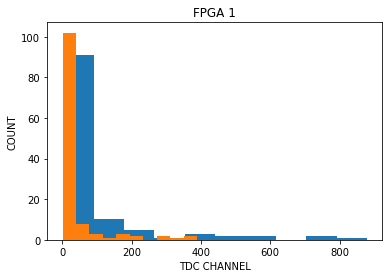

In [137]:
import matplotlib.pyplot as plt


plt.hist(FPGA_0)
plt.title('FPGA 0')
plt.xlabel('TDC channel')
plt.ylabel('Count')

plt.hist(FPGA_1)
plt.title('FPGA 1')
plt.xlabel('TDC CHANNEL')
plt.ylabel('COUNT')

plt.show()